In [2]:
!unzip '/content/archive (2).zip'

Archive:  /content/archive (2).zip
replace fraudTest.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [1]:
import pandas as pd
import numpy as np
import math,copy

In [2]:
data=pd.read_csv('/content/fraudTrain.csv')

In [3]:
data.shape

(1296675, 23)

In [4]:
data.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [5]:
data.drop(['Unnamed: 0','street','dob','job','trans_date_trans_time'],axis=1,inplace=True)

In [6]:
data.head(4)

,cc_num,merchant,category,amt,first,last,gender,city,state,zip,lat,long,city_pop,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,Orient,WA,99160,48.8878,-118.2105,149,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,Malad City,ID,83252,42.1808,-112.2620,4154,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,Boulder,MT,59632,46.2306,-112.1138,1939,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0


In [7]:
data.shape

(1296675, 18)

In [8]:
data.isnull().sum()

,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
city,0
state,0
zip,0


In [9]:
data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
data['state'].unique()

array(['NC', 'WA', 'ID', 'MT', 'VA', 'PA', 'KS', 'TN', 'IA', 'WV', 'FL',
       'CA', 'NM', 'NJ', 'OK', 'IN', 'MA', 'TX', 'WI', 'MI', 'WY', 'HI',
       'NE', 'OR', 'LA', 'DC', 'KY', 'NY', 'MS', 'UT', 'AL', 'AR', 'MD',
       'GA', 'ME', 'AZ', 'MN', 'OH', 'CO', 'VT', 'MO', 'SC', 'NV', 'IL',
       'NH', 'SD', 'AK', 'ND', 'CT', 'RI', 'DE'], dtype=object)

In [12]:
data['state'].value_counts()

,count
state,
TX,94876
NY,83501
PA,79847
CA,56360
OH,46480
MI,46154
IL,43252
FL,42671
AL,40989


In [13]:
data.head(2)

,cc_num,merchant,category,amt,first,last,gender,city,state,zip,lat,long,city_pop,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,Orient,WA,99160,48.8878,-118.2105,149,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [14]:
data['category'].nunique()

14

In [15]:
data.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [16]:
cat_variables = data.columns

for col in cat_variables:
    print(f"{col}: {data[col].nunique()}")

cc_num: 983
merchant: 693
category: 14
amt: 52928
first: 352
last: 481
gender: 2
city: 894
state: 51
zip: 970
lat: 968
long: 969
city_pop: 879
trans_num: 1296675
unix_time: 1274823
merch_lat: 1247805
merch_long: 1275745
is_fraud: 2


In [17]:
data = data.drop(['trans_num', 'cc_num', 'first', 'last'], axis=1)

In [18]:
data.head(4)

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0


In [19]:
data.shape

(1296675, 14)

In [20]:
data['hour'] = pd.to_datetime(data['unix_time'], unit='s').dt.hour
data['day'] = pd.to_datetime(data['unix_time'], unit='s').dt.day
data['weekday'] = pd.to_datetime(data['unix_time'], unit='s').dt.weekday

In [21]:
data.head(4)

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hour,day,weekday
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,0,1,6
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,0,1,6
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,0,1,6
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,0,1,6


In [22]:
data = data.drop('unix_time', axis=1)

In [23]:
data = pd.get_dummies(data, columns=['category', 'gender', 'state'], drop_first=True)

In [24]:
data.head(1)

,merchant,amt,city,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,"fraud_Rippin, Kub and Mann",4.97,Moravian Falls,28654,36.0788,-81.1781,3495,36.011293,-82.048315,0,...,False,False,False,False,False,False,False,False,False,False


In [25]:
data.shape

(1296675, 77)

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
for col in ['merchant', 'city', 'zip']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))

In [28]:
data.head(1)

,merchant,amt,city,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,514,4.97,526,216,36.0788,-81.1781,3495,36.011293,-82.048315,0,...,False,False,False,False,False,False,False,False,False,False


In [29]:
data.shape

(1296675, 77)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(data.drop('is_fraud',axis=1),data['is_fraud'],test_size=0.2,random_state=42)

In [32]:
x_train.shape,x_test.shape

((1037340, 76), (259335, 76))

Building the models 3 ways

1.Decision Trees

2.Random Forest

3.xgboost

i will try with all the three methods lets see which is the most accuarte model

In [33]:
# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [35]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]

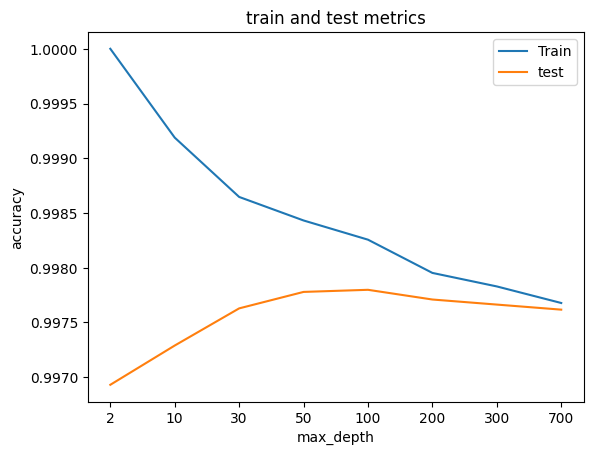

In [41]:
accuracy_list_train=[]
accuracy_list_test=[]
for min_samples_split in min_samples_split_list:
  model=DecisionTreeClassifier(min_samples_split=min_samples_split,random_state=42).fit(x_train,y_train)
  train_predict=model.predict(x_train)
  test_predict=model.predict(x_test)
  accuracy_train=accuracy_score(train_predict,y_train)
  accuracy_test=accuracy_score(test_predict,y_test)
  accuracy_list_train.append(accuracy_train)
  accuracy_list_test.append(accuracy_test)
plt.title('train and test metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(min_samples_split_list)),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','test'])

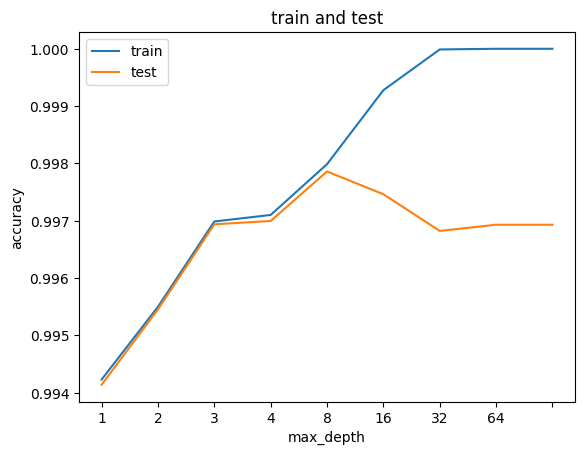

In [42]:
accuracy_list_train=[]
accuracy_list_test=[]
for max_depth in max_depth_list:
  model=DecisionTreeClassifier(max_depth=max_depth,random_state=42).fit(x_train,y_train)
  train_pedict=model.predict(x_train)
  test_predict=model.predict(x_test)
  accuracy_train=accuracy_score(train_pedict,y_train)
  accuracy_test=accuracy_score(test_predict,y_test)
  accuracy_list_train.append(accuracy_train)
  accuracy_list_test.append(accuracy_test)
plt.title('train and test')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(max_depth_list)),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['train','test'])

In [43]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 50,
                                             max_depth = 8,
                                             random_state = 42).fit(x_train,y_train)

In [46]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(x_train),y_train):.4f}")
print(f"Metrics test:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(x_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9979
Metrics test:
	Accuracy score: 0.9979


In [47]:
data.head(1)

,merchant,amt,city,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,514,4.97,526,216,36.0788,-81.1781,3495,36.011293,-82.048315,0,...,False,False,False,False,False,False,False,False,False,False


In [71]:
predict_1 = x_train.iloc[[0]].values
prediction = decision_tree_model.predict(predict_1)
print(prediction)

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [72]:
if prediction[0]==0:
  print('not fraud')
else:
  print('fraud')

not fraud


In [65]:
data.head(1)

,merchant,amt,city,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,514,4.97,526,216,36.0788,-81.1781,3495,36.011293,-82.048315,0,...,False,False,False,False,False,False,False,False,False,False


In [67]:
import joblib
joblib.dump(decision_tree_model, 'credit_card_fraud_detection.joblib')

['credit_card_fraud_detection.joblib']